In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data.xlsx')
df.head()

c:\Users\arsha\Downloads\ML\myenv\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [46]:
df.shape

(376124, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


Numerical cols stored as objects

In [5]:
# Convert object columns to float
cols_to_convert = [
    "Cyclone_Inlet_Gas_Temp",
    "Cyclone_Material_Temp",
    "Cyclone_Outlet_Gas_draft",
    "Cyclone_cone_draft",
    "Cyclone_Gas_Outlet_Temp",
    "Cyclone_Inlet_Draft",
]

df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors="coerce")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    376399 non-null  float64       
 2   Cyclone_Material_Temp     376128 non-null  float64       
 3   Cyclone_Outlet_Gas_draft  376398 non-null  float64       
 4   Cyclone_cone_draft        376399 non-null  float64       
 5   Cyclone_Gas_Outlet_Temp   376398 non-null  float64       
 6   Cyclone_Inlet_Draft       376397 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.2 MB


In [7]:
df.isnull().sum()/df.shape[0]

time                        0.000000
Cyclone_Inlet_Gas_Temp      0.003495
Cyclone_Material_Temp       0.004212
Cyclone_Outlet_Gas_draft    0.003497
Cyclone_cone_draft          0.003495
Cyclone_Gas_Outlet_Temp     0.003497
Cyclone_Inlet_Draft         0.003500
dtype: float64

very less percentage of vals missing, so cd remove them, but before that lets check some patterns
Wether it MCAR, MAR of MNAR 

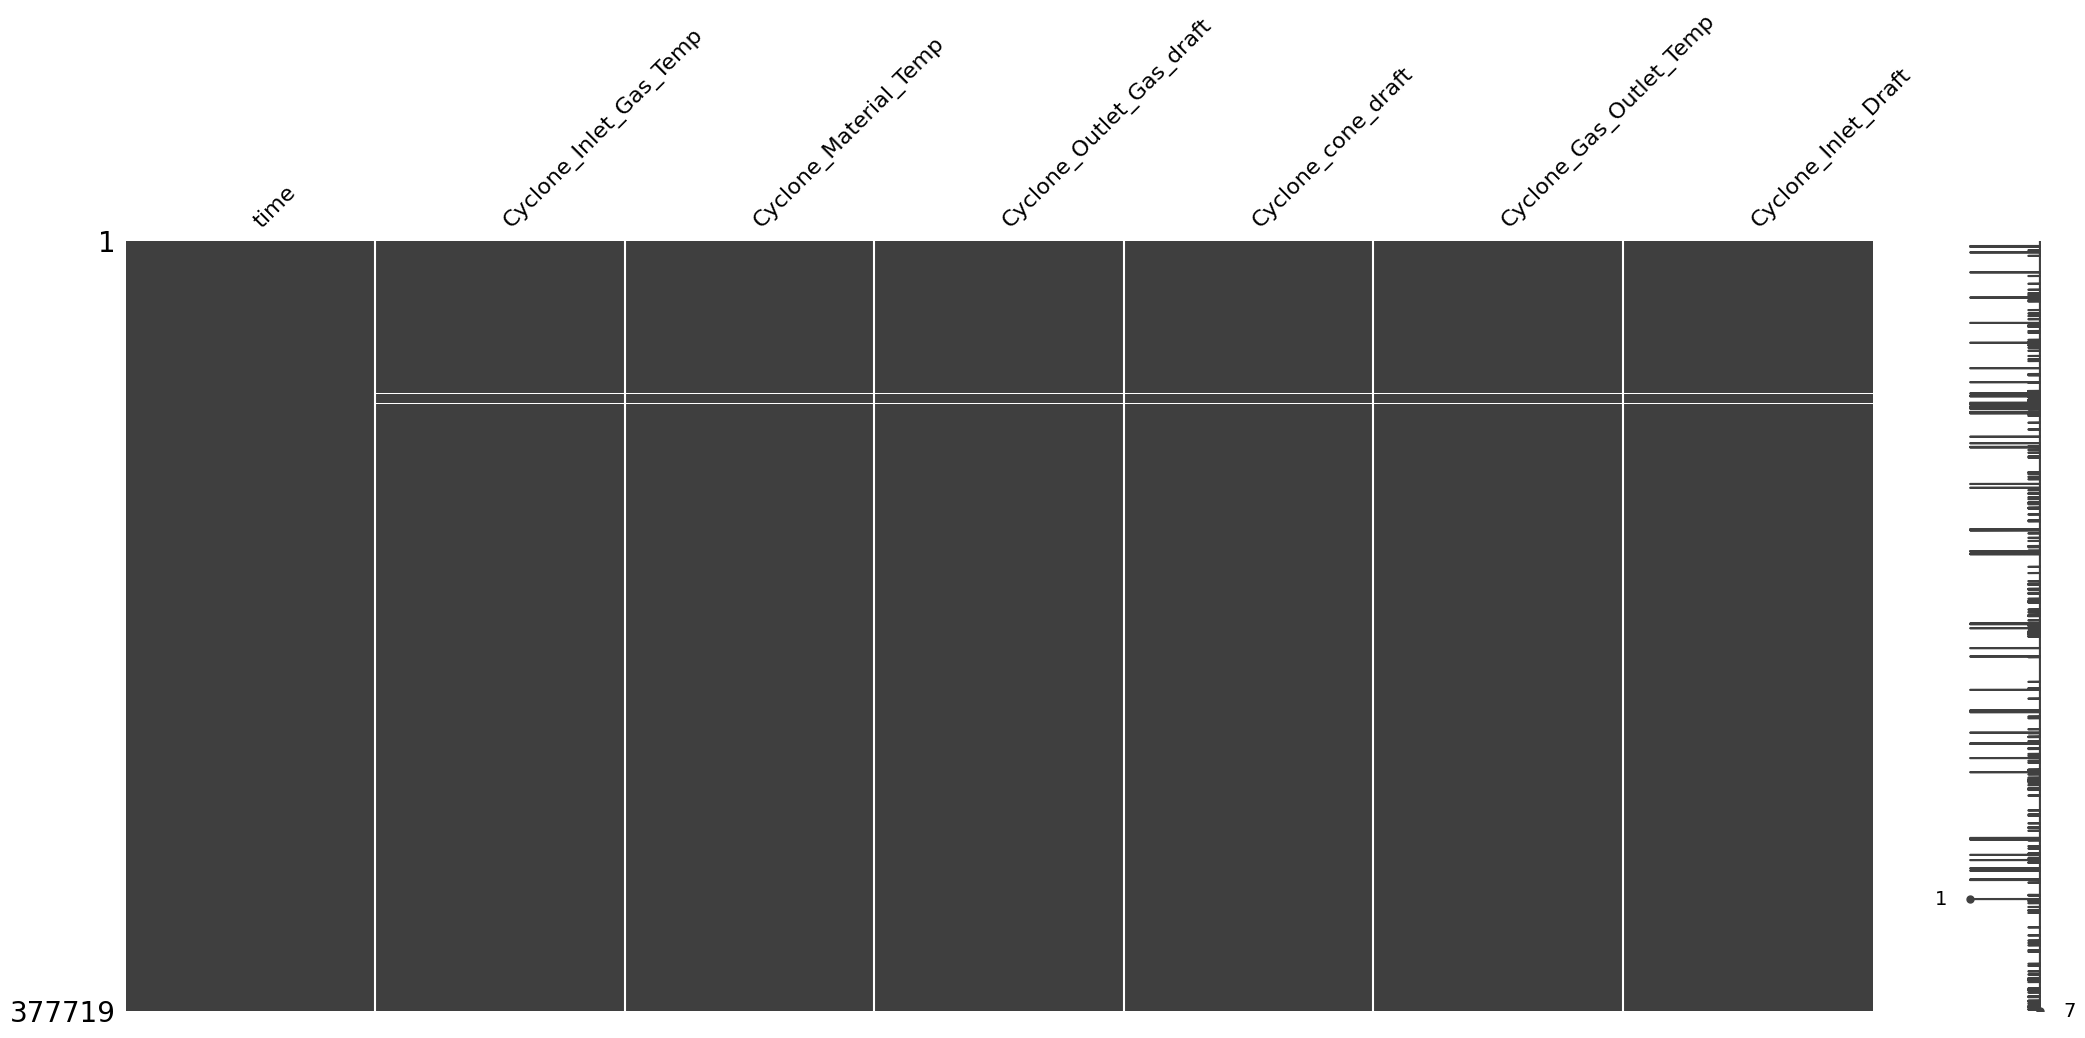

In [8]:
# Matrix chart to visualize missing values
msno.matrix(df)
plt.show()

Nothing much visible, but one thing clear that min cols is 1 in all the place4s, that means where one col apart from temp is missing rest all are missing as well

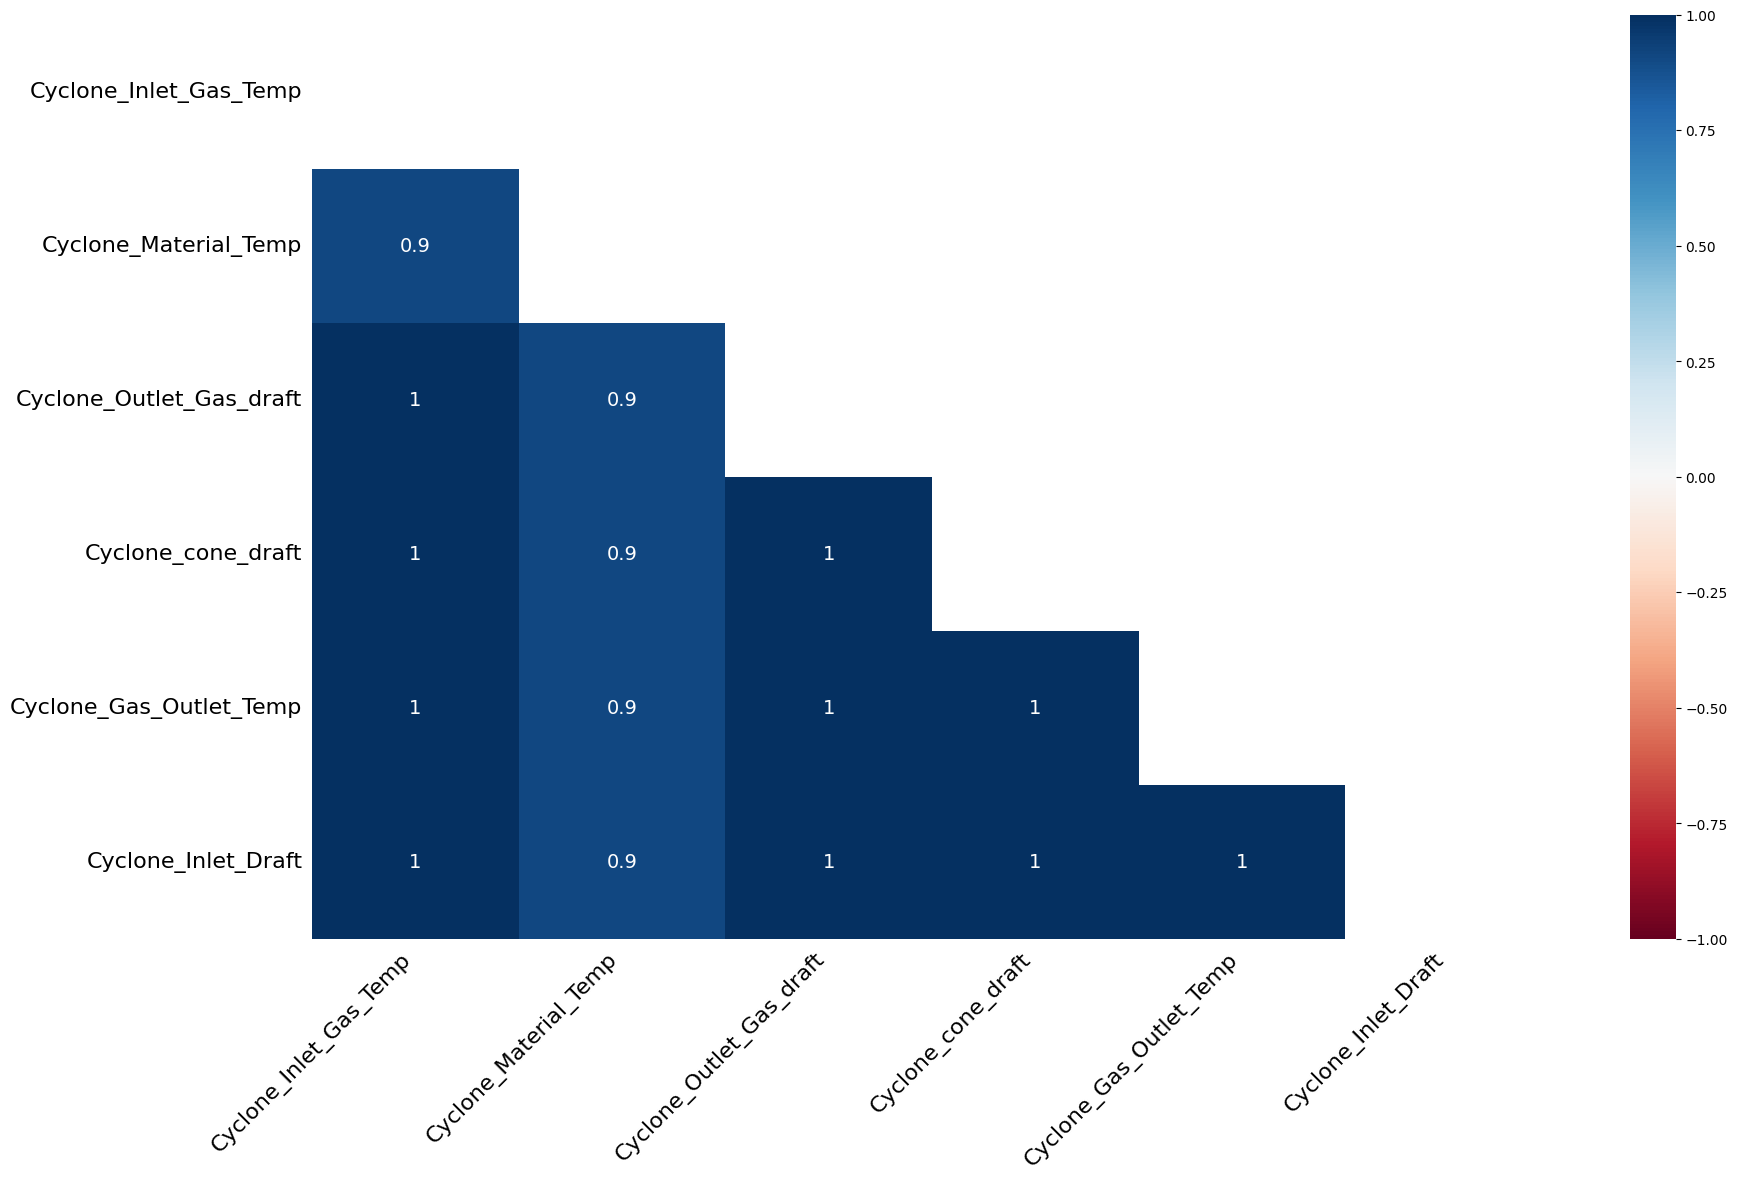

In [9]:
# Heatmap to visualize the correlation of missingness between columns
msno.heatmap(df)
plt.show()

as indicated above, thus the best option is to remove these missing vals, no way to impute

array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'Cyclone_Inlet_Gas_Temp'}>,
        <Axes: title={'center': 'Cyclone_Material_Temp'}>],
       [<Axes: title={'center': 'Cyclone_Outlet_Gas_draft'}>,
        <Axes: title={'center': 'Cyclone_cone_draft'}>,
        <Axes: title={'center': 'Cyclone_Gas_Outlet_Temp'}>],
       [<Axes: title={'center': 'Cyclone_Inlet_Draft'}>, <Axes: >,
        <Axes: >]], dtype=object)

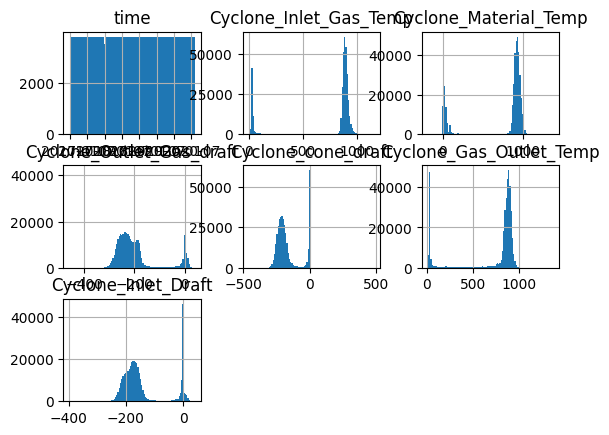

In [10]:
df.hist(bins = 100)

In [11]:
df = df.dropna(subset=df.columns[1:], how='all')

# Verify new shape after dropping rows
df.shape

(376399, 7)

In [12]:
df.isnull().sum()/df.shape[0]

time                        0.000000
Cyclone_Inlet_Gas_Temp      0.000000
Cyclone_Material_Temp       0.000720
Cyclone_Outlet_Gas_draft    0.000003
Cyclone_cone_draft          0.000000
Cyclone_Gas_Outlet_Temp     0.000003
Cyclone_Inlet_Draft         0.000005
dtype: float64

now lets check again with the help of missingo 

In [13]:
df.isnull().sum()

time                          0
Cyclone_Inlet_Gas_Temp        0
Cyclone_Material_Temp       271
Cyclone_Outlet_Gas_draft      1
Cyclone_cone_draft            0
Cyclone_Gas_Outlet_Temp       1
Cyclone_Inlet_Draft           2
dtype: int64

array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'Cyclone_Inlet_Gas_Temp'}>,
        <Axes: title={'center': 'Cyclone_Material_Temp'}>],
       [<Axes: title={'center': 'Cyclone_Outlet_Gas_draft'}>,
        <Axes: title={'center': 'Cyclone_cone_draft'}>,
        <Axes: title={'center': 'Cyclone_Gas_Outlet_Temp'}>],
       [<Axes: title={'center': 'Cyclone_Inlet_Draft'}>, <Axes: >,
        <Axes: >]], dtype=object)

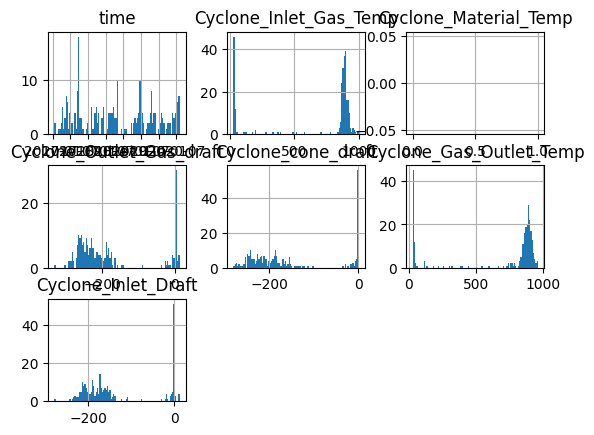

In [14]:
df[df['Cyclone_Material_Temp'].isnull()].hist(bins = 100)

array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'Cyclone_Inlet_Gas_Temp'}>,
        <Axes: title={'center': 'Cyclone_Material_Temp'}>],
       [<Axes: title={'center': 'Cyclone_Outlet_Gas_draft'}>,
        <Axes: title={'center': 'Cyclone_cone_draft'}>,
        <Axes: title={'center': 'Cyclone_Gas_Outlet_Temp'}>],
       [<Axes: title={'center': 'Cyclone_Inlet_Draft'}>, <Axes: >,
        <Axes: >]], dtype=object)

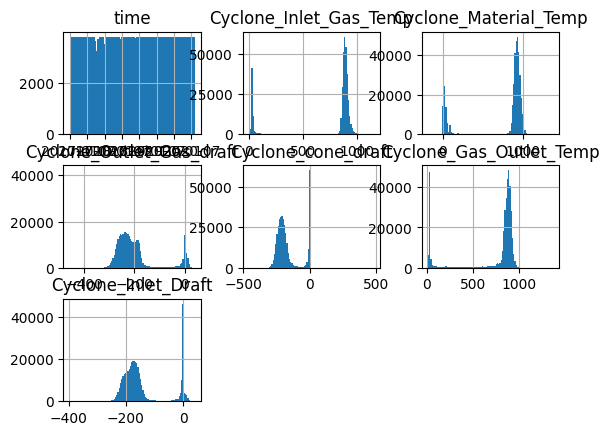

In [15]:
df.hist(bins = 100)

the entires where temp is missing has the same distribution, thus best option is removal confirmed

In [16]:
df = df.dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376124 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      376124 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    376124 non-null  float64       
 2   Cyclone_Material_Temp     376124 non-null  float64       
 3   Cyclone_Outlet_Gas_draft  376124 non-null  float64       
 4   Cyclone_cone_draft        376124 non-null  float64       
 5   Cyclone_Gas_Outlet_Temp   376124 non-null  float64       
 6   Cyclone_Inlet_Draft       376124 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 23.0 MB


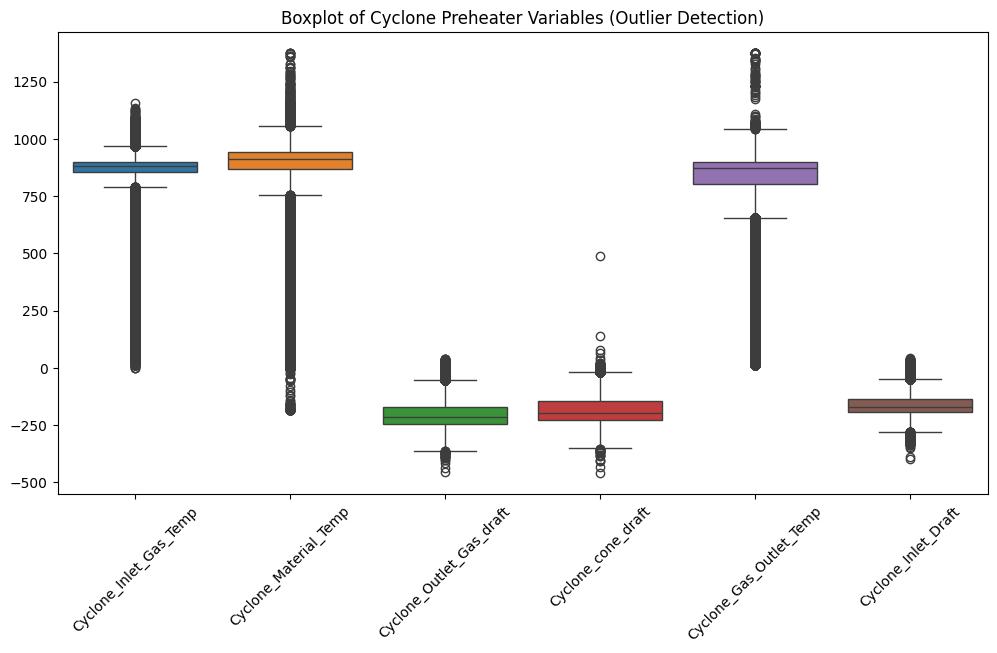

In [17]:
import seaborn as sns

# Set plot style

# Boxplot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Cyclone Preheater Variables (Outlier Detection)")
plt.show()

maybe not outlier individually but as a whole - thus multivariate outlier detection

In [18]:
num_cols = [
    "Cyclone_Inlet_Gas_Temp", "Cyclone_Material_Temp", 
    "Cyclone_Outlet_Gas_draft", "Cyclone_cone_draft", 
    "Cyclone_Gas_Outlet_Temp", "Cyclone_Inlet_Draft"
]

In [20]:
from sklearn.preprocessing import StandardScaler
# Standardize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_cols])
df_scaled = pd.DataFrame(df_scaled, columns=num_cols)
df_scaled["time"] = df["time"]  # Keep timestamp

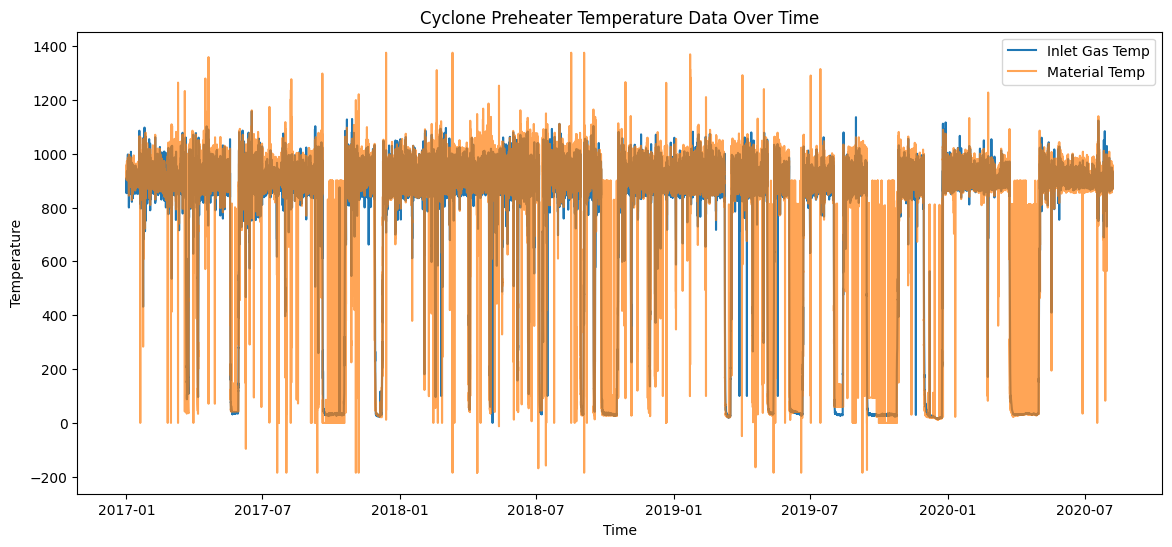

In [24]:
# Plot original time-series data
plt.figure(figsize=(14, 6))
sns.lineplot(x=df["time"], y=df["Cyclone_Inlet_Gas_Temp"], label="Inlet Gas Temp")
sns.lineplot(x=df["time"], y=df["Cyclone_Material_Temp"], label="Material Temp", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Cyclone Preheater Temperature Data Over Time")
plt.legend()
plt.show()

but what if the outlier is a local outlier

In [ ]:
# use LOF

build a pipeline to try various anomaly detection techniques

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# from sklearn.ensemble import IsolationForest
# from sklearn.svm import OneClassSVM
# from sklearn.cluster import DBSCAN
# from sklearn.neighbors import LocalOutlierFactor
# from sklearn.base import BaseEstimator, TransformerMixin
# from skopt import BayesSearchCV
# from skopt.space import Real, Integer

In [ ]:
# class TSNETransformer(BaseEstimator, TransformerMixin):
#     def __init__(self, n_components=2, perplexity=30):
#         self.n_components = n_components
#         self.perplexity = perplexity

#     def fit(self, X, y=None):
#         return self  

#     def transform(self, X):
#         return TSNE(n_components=self.n_components, perplexity=self.perplexity, random_state=42).fit_transform(X)




In [ ]:
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df[num_cols])
# df_scaled = pd.DataFrame(df_scaled, columns=num_cols)
# df_scaled["time"] = df["time"]

Models for anamoly detection

In [ ]:
# models = {
#     "Isolation Forest": IsolationForest(contamination=0.01, random_state=42),
#     "DBSCAN": DBSCAN(eps=0.3, min_samples=5),
#     "One-Class SVM": OneClassSVM(kernel="rbf", nu=0.01),
#     "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, contamination=0.01, novelty=True)
# }

In [ ]:
# pipeline = Pipeline([
#     ("features", feature_union),
#     ("model", models["Isolation Forest"])  # Default model, can be changed dynamically
# ])


In [ ]:
# pipeline.fit(df_scaled.drop(columns=["time"]))

# df["Anomaly_Score"] = pipeline.named_steps["model"].decision_function(pipeline.transform(df_scaled.drop(columns=["time"])))

In [ ]:
# plt.figure(figsize=(12, 6))
# plt.plot(df["time"], df["Anomaly_Score"], label="Anomaly Score", alpha=0.7)
# plt.xlabel("Time")
# plt.ylabel("Anomaly Score")
# plt.legend()
# plt.title("Anomaly Scores Over Time")
# plt.show()

foir hyper parameter turning use Bayes optmisiation

In [ ]:
# param_space_iforest = {
#     "model__n_estimators": Integer(50, 500),
#     "model__max_features": Real(0.1, 1.0),
#     "model__contamination": Real(0.01, 0.1)
# }

In [ ]:
# opt_iforest = BayesSearchCV(
#     pipeline,
#     search_spaces=param_space_iforest,
#     n_iter=20,
#     cv=3,
#     n_jobs=-1,
#     random_state=42
# )

In [ ]:
# opt_iforest.fit(df_scaled.drop(columns=["time"]))

# print("Best Parameters for Isolation Forest:", opt_iforest.best_params_)

In [ ]:
# pipeline.set_params(model=DBSCAN())
# param_space_dbscan = {
#     "model__eps": Real(0.1, 1.0),
#     "model__min_samples": Integer(3, 20)
# }

In [ ]:
# opt_dbscan = BayesSearchCV(
#     pipeline,
#     search_spaces=param_space_dbscan,
#     n_iter=20,
#     cv=3,
#     n_jobs=-1,
#     random_state=42
# )

# opt_dbscan.fit(df_scaled.drop(columns=["time"]))
# print("Best Parameters for DBSCAN:", opt_dbscan.best_params_)

Comparison

In [ ]:

# for model_name, model in models.items():
#     pipeline.set_params(model=model)
#     pipeline.fit(df_scaled.drop(columns=["time"]))
    
#     if model_name == "Local Outlier Factor":
#         df[model_name] = model.decision_function(pipeline.transform(df_scaled.drop(columns=["time"])))
#     else:
#         df[model_name] = pipeline.named_steps["model"].decision_function(pipeline.transform(df_scaled.drop(columns=["time"])))

# # Plot anomaly scores for all models
# plt.figure(figsize=(12, 6))
# for model_name in models.keys():
#     plt.plot(df["time"], df[model_name], label=model_name, alpha=0.7)

# plt.xlabel("Time")
# plt.ylabel("Anomaly Score")
# plt.legend()
# plt.title("Comparison of Anomaly Detection Models")
# plt.show()


Now lets figure out the best approach for our dats since our dimensionality is good but the rows are almost 350k
1. DB scan is poorly scalable with slow speed so we cant use it
2. HDB Scan slightly more efficient
3. Downsample wdnt help
4. LOF compares pairwsie distances so slow as well
5. Isolation Forest- excellent nlogn, very fast and thus the best choice for our use case

In [47]:
df.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,IF_Anomaly_Score,LOF_Anomaly_Score,IF_Anomaly,LOF_Anomaly,PCA_1,PCA_2
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,0.282497,0.580800,0,NaN,250.264915,19.762180
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,0.284485,0.659948,0,NaN,265.967970,18.709848
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,0.267715,0.650235,0,NaN,266.250757,26.450782
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,0.263702,0.670904,0,NaN,265.891655,25.307936
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,0.259905,0.682187,0,NaN,286.778619,24.886637


In [48]:
# Standardize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_cols])
df_scaled = pd.DataFrame(df_scaled, columns=num_cols)
df_scaled["time"] = df["time"]

In [49]:
df_scaled.head()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,time
0,0.426743,0.454778,-0.118110,-0.238160,0.419074,-0.059145,2017-01-01 00:00:00
1,0.462041,0.476777,-0.065557,-0.194429,0.451043,-0.108881,2017-01-01 00:05:00
2,0.451208,0.493989,-0.034591,-0.020948,0.461894,-0.047677,2017-01-01 00:10:00
3,0.450021,0.491054,-0.013307,-0.113737,0.461249,-0.019459,2017-01-01 00:15:00
4,0.499864,0.522713,-0.004935,-0.101417,0.492633,-0.026803,2017-01-01 00:20:00


Isolation Forest

c:\Users\arsha\Downloads\ML\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


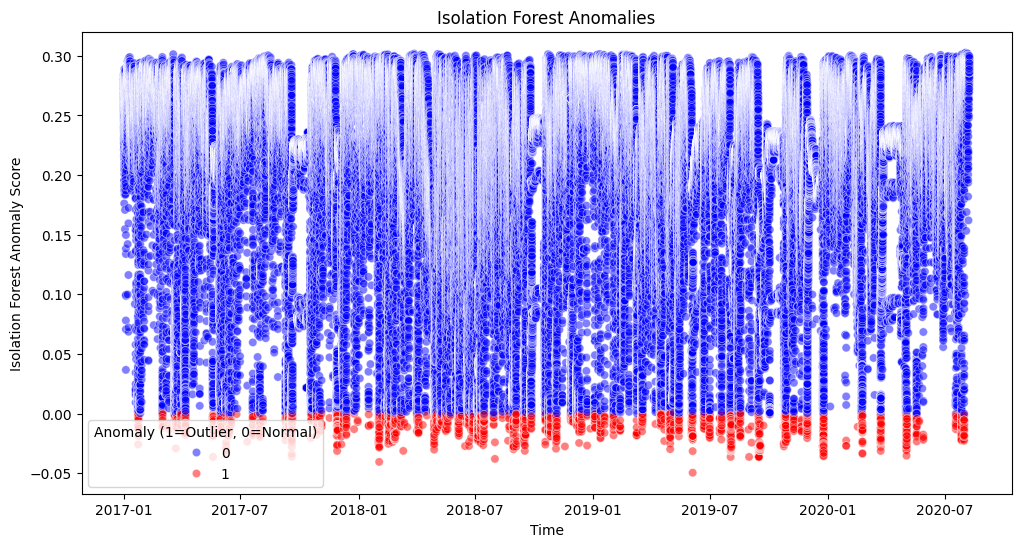

In [ ]:

isoforest = IsolationForest(contamination=0.01, n_estimators=200, random_state=42, n_jobs=-1)
isoforest.fit(df_scaled.drop(columns=["time"]))

# Predict anomalies
df["IF_Anomaly_Score"] = isoforest.decision_function(df_scaled.drop(columns=["time"]))
df["IF_Anomaly"] = (df["IF_Anomaly_Score"] < 0).astype(int)

# Plot Isolation Forest results
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="time", y="IF_Anomaly_Score", hue=df["IF_Anomaly"], palette={0: "blue", 1: "red"}, alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Isolation Forest Anomaly Score")
plt.title("Isolation Forest Anomalies")
plt.legend(title="Anomaly (1=Outlier, 0=Normal)")
plt.show()


Anomaly Detection Insights
Our anomaly detection analysis using Isolation Forest provides several key observations:

Most anomalies have low anomaly scores

As expected, Isolation Forest assigns negative scores to outliers.
The detected anomalies (red points) are primarily concentrated at the bottom of the score distribution, reinforcing that the model correctly identifies them as outliers.
Consistent anomaly patterns over time

The frequency of anomalies remains steady across different time periods.
This suggests that anomalies might follow a recurring pattern rather than being random.
In domains like sensor monitoring, network traffic, or finance, this could indicate seasonal trends or periodic disruptions.
Some normal points have high anomaly scores

A few normal data points (blue) show relatively high anomaly scores (~0.3).
This suggests that while these points deviate slightly from the norm, they are not necessarily anomalies.
It could be due to natural variability in the dataset rather than actual outliers

In [33]:
df.columns

Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft', 'IF_Anomaly_Score',
       'LOF_Anomaly_Score', 'IF_Anomaly'],
      dtype='object')

In [36]:
df["IF_Anomaly"].value_counts()

IF_Anomaly
0    372362
1      3762
Name: count, dtype: int64

Now we can run LOF on the pre filtered anomalies done by isolation forest
mini batch wont be of much use

In [51]:
from sklearn.neighbors import LocalOutlierFactor

# Filter only anomalies detected by Isolation Forest
anomalies_df = df[df["IF_Anomaly"] == 1].drop(columns=["time"])  

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05, novelty=False)
lof_labels = lof.fit_predict(anomalies_df)

# Convert -1 (outlier) and 1 (inlier) to binary format
df.loc[df["IF_Anomaly"] == 1, "LOF_Anomaly"] = (lof_labels == -1).astype(int)

# Count the refined anomalies
print(df["LOF_Anomaly"].value_counts())



LOF_Anomaly
0.0    3573
1.0     189
Name: count, dtype: int64


Visualizing the anamolies

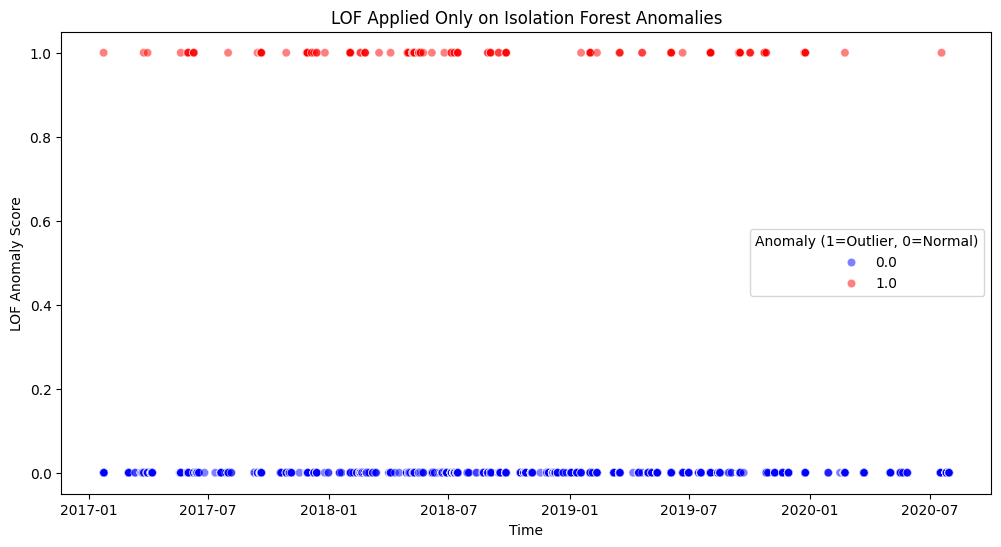

In [ ]:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="time", y="LOF_Anomaly", hue=df["LOF_Anomaly"], palette={0: "blue", 1: "red"}, alpha=0.5)
plt.xlabel("Time")
plt.ylabel("LOF Anomaly Score")
plt.title("LOF Applied Only on Isolation Forest Anomalies")
plt.legend(title="Anomaly (1=Outlier, 0=Normal)")
plt.show()

The red points represent anomalies (outliers) detected by Isolation Forest and then evaluated by  (LOF).
The fact that these anomalies have high LOF scores (~1.0) suggests that LOF agrees with Isolation Forest's anomaly classification.

In [53]:
df.columns

Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft', 'IF_Anomaly_Score',
       'LOF_Anomaly_Score', 'IF_Anomaly', 'LOF_Anomaly', 'PCA_1', 'PCA_2'],
      dtype='object')

PCA to visualize in lower dims

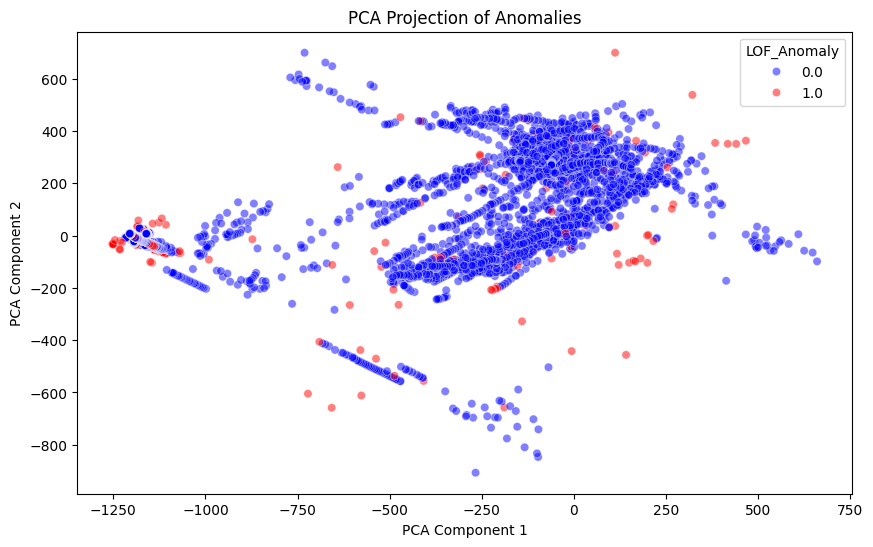

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=["time", 'IF_Anomaly_Score',
       'LOF_Anomaly_Score', 'IF_Anomaly', 'LOF_Anomaly']))

df["PCA_1"], df["PCA_2"] = df_pca[:, 0], df_pca[:, 1]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PCA_1"], y=df["PCA_2"], hue=df["LOF_Anomaly"], palette={0: "blue", 1: "red"}, alpha=0.5)
plt.title("PCA Projection of Anomalies")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


effectively detects outliers and shows both borderline and extreme anomalies, 

UMAP for speed since tsne not working as we wanted to see local clusters, thus will just have to leave it for now

In [59]:
import umap.umap_ as umap

# Apply UMAP (Reduce to 2D for visualization)
df_scaled = df_scaled.select_dtypes(exclude=['datetime64'])

umap_2d = umap.UMAP(n_components=2, n_neighbors=30, min_dist=0.3, metric='euclidean', random_state=42)
embedding = umap_2d.fit_transform(df_scaled)

# Add UMAP results to the dataframe
df["UMAP1"] = embedding[:, 0]
df["UMAP2"] = embedding[:, 1]

# Visualizing with anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="UMAP1", y="UMAP2", hue="Anomaly_Label", palette={0: "blue", 1: "red"}, alpha=0.5)
plt.title("UMAP Visualization of Anomalies")
plt.legend(title="Anomaly (0=Normal, 1=Outlier)")
plt.show()

c:\Users\arsha\Downloads\ML\myenv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


KeyboardInterrupt: 

Since we don’t have labeled anomalies, we need to manually optimize the hyperparameters using Bayesian Optimization

so we need to define a custom function that trains isoation forest and evals separation, 
nd since we dont have labeled anomalies we have metrics such as 
1. silhouette score
2. cluuster compactness - variance
3. contamination senstivity

In [64]:
from skopt import gp_minimize
from skopt.space import Integer, Real
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
import numpy as np

# Define the search space for hyperparameters
search_space = [
    Integer(50, 500, name="n_estimators"),         # Number of trees
    Real(0.1, 1.0, name="max_samples"),            # Fraction of data used in each tree
    Real(0.01, 0.1, name="contamination"),         # Assumed anomaly percentage
    Real(0.5, 1.0, name="max_features")            # Number of features per tree
]

# Define the objective function for Bayesian Optimization
def objective(params):
    n_estimators, max_samples, contamination, max_features = params
    
    # Train Isolation Forest with given parameters
    model = IsolationForest(
        n_estimators=int(n_estimators),
        max_samples=max_samples,
        contamination=contamination,
        max_features=max_features,
        random_state=42
    )
    
    model.fit(df_scaled)
    preds = model.predict(df_scaled)
    preds = np.where(preds == -1, 1, 0)  # Convert (-1=Anomaly, 1=Normal) → (1=Anomaly, 0=Normal)

    # Compute Silhouette Score to measure anomaly separation
    if len(np.unique(preds)) > 1:
        score = silhouette_score(df_scaled, preds)
    else:
        score = -1  # Avoid scoring if only one cluster exists

    return -score  # Minimize negative silhouette score (maximize real score)

# Run Bayesian Optimization (gp_minimize)
result = gp_minimize(objective, search_space, n_calls=30, random_state=42)

# Extract the best parameters found
best_params = {
    "n_estimators": result.x[0],
    "max_samples": result.x[1],
    "contamination": result.x[2],
    "max_features": result.x[3]
}
print("✅ Best Parameters Found:", best_params)



KeyboardInterrupt: 